# Sentiment Analysis for Movie Reviews

## 1. Load the Data

In [9]:
import pandas as pd

# Load the dataset
imdb = pd.read_csv('./dataset/IMDB_Dataset.csv')

# Display the first few rows of the dataset
print(imdb.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## 2. Check for Duplicates and Missing Values

In [10]:
# Check for duplicates
duplicates = imdb.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Drop duplicates if any
imdb = imdb.drop_duplicates()

# Check for missing values
missing_values = imdb.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Since there are no missing values, we can proceed to the next step

Number of duplicates: 418
Missing values:
review       0
sentiment    0
dtype: int64


## 3. Data Preprocessing

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stop words and perform stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
imdb['cleaned_review'] = imdb['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Exploratory Data Analysis (EDA)

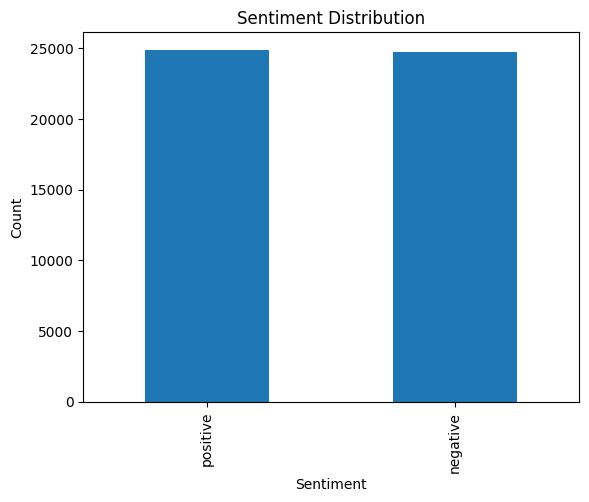

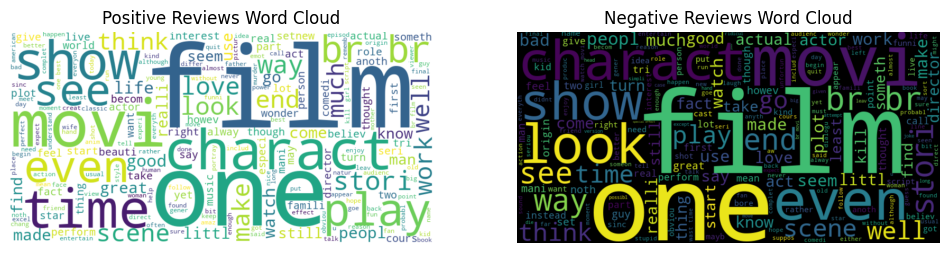

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot sentiment distribution
imdb['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate a word cloud for positive and negative reviews
positive_reviews = ' '.join(imdb[imdb['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(imdb[imdb['sentiment'] == 'negative']['cleaned_review'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

## 5. Feature Engineering

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(imdb['cleaned_review'])
y = imdb['sentiment'].map({'positive': 1, 'negative': 0})

## 6. Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)

# Train models
nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate models
print("Naive Bayes Model Performance:")
print(classification_report(y_test, nb_predictions))

print("Logistic Regression Model Performance:")
print(classification_report(y_test, lr_predictions))

Naive Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4939
           1       0.85      0.86      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.89      0.88      0.88      9917
weighted avg       0.89      0.88      0.88      9917



## 7. Improve the Model

In [15]:
# This section would involve using libraries like TensorFlow/Keras for LSTM or Hugging Face's transformers for BERT.
# Example code is not provided due to complexity, but you can follow respective documentation for implementation.

## 8. Deployment

In [16]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the trained model and vectorizer
nb_model = joblib.load('naive_bayes_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    review = data['review']
    
    # Preprocess the review
    processed_review = preprocess_text(review)
    review_vector = vectorizer.transform([processed_review])
    
    # Make prediction
    prediction = nb_model.predict(review_vector)[0]
    
    sentiment = 'positive' if prediction == 1 else 'negative'
    return jsonify({'sentiment': sentiment})

if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'naive_bayes_model.pkl'

## 9. Test and Improve Regularly